In [6]:
!pip install cartopy

import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import matplotlib.colors as mcolors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os

# Caminho para o diretório raiz do Google Drive
drive_path = '/content/drive/MyDrive/2023072800.nc'

# Listar os arquivos e diretórios no diretório raiz do Google Drive
#for file_name in os.listdir(drive_path):
#    print(file_name)


Mounted at /content/drive


In [7]:
#path_grib_1 = "C:/Users/naiar/Downloads/"
#fname_grib_1 = "2023072800.nc"
data = xr.open_dataset(drive_path)

time_next_day_6 = data.time[30]
time_next_day_12 = data.time[36]
time_next_day_15 = data.time[39]
time_next_day_18 = data.time[42]

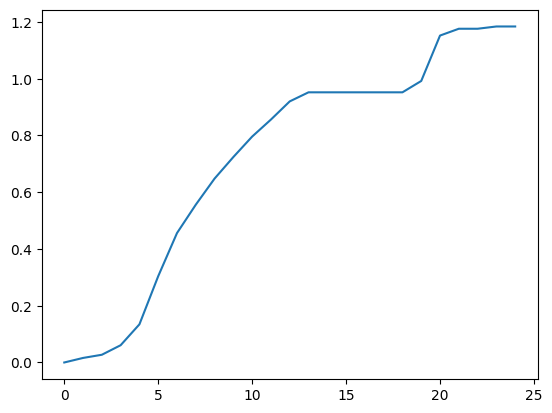

In [8]:
tcc = data["APCP_surface"].sel(time=slice(data.time[0], data.time[24]), latitude=data.latitude[0], longitude=data.longitude[0])#.sum(dim='time')
#print(data.time[0])
#print(data.time[23])
plt.plot(tcc)

In [9]:
def create_plot_temperature(start_time):

    # Create a new plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    title = 'Temperatura do ar (°C): ' + str(pd.to_datetime(start_time.values).year) + '-' + str(pd.to_datetime(start_time.values).month) + '-' + str(pd.to_datetime(start_time.values).day) + ' ' + str(pd.to_datetime(start_time.values).hour) + ':00 UTC'
    bar_title = 'Temperatura do ar (°C)'

    tcc = data["TMP_2maboveground"].sel(time=slice(start_time, start_time))
    tcc = tcc - 273.15

    # Define the grid for interpolation
    longitude_grid, latitude_grid = np.meshgrid(tcc.coords['longitude'], tcc.coords['latitude'])

    # Reshape the data for interpolation
    longitude_points = longitude_grid.flatten()
    latitude_points = latitude_grid.flatten()
    tcc_values = tcc.values.flatten()

    # Define the grid for plotting
    plot_longitude_grid, plot_latitude_grid = np.meshgrid(np.linspace(tcc.coords['longitude'].min(), tcc.coords['longitude'].max(), 1000), np.linspace(tcc.coords['latitude'].min(), tcc.coords['latitude'].max(), 1000))

    # Interpolate the data onto the plotting grid
    interpolated_tcc = griddata((longitude_points, latitude_points), tcc_values, (plot_longitude_grid, plot_latitude_grid), method='cubic')

    # Define os valores de cor para diferentes intervalos de dados

    bounds = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 36.0, 38.0, 40.0, 42.0]
    colors = [(0/255, 0/255, 121/255), (35/255, 34/255, 107/255), (70/255, 68/255, 93/255), (96/255, 93/255, 126/255), (121/255, 118/255, 159/255), (149/255, 146/255, 196/255), (177/255, 173/255, 233/255), (126/255, 147/255, 200/255), (75/255, 121/255, 167/255), (100/255, 160/255, 221/255), (107/255, 185/255, 185/255), (190/255, 255/255, 245/255), (252/255, 255/255, 216/255), (247/255, 236/255, 154/255), (255/255, 211/255, 71/255), (255/255, 167/255, 89/255), (255/255, 114/255, 32/255), (215/255, 71/255, 0/255), (254/255, 187/255, 187/255), (254/255, 137/255, 137/255), (254/255, 78/255, 78/255), (200/255, 61/255, 61/255), (179/255, 54/255, 54/255), (119/255, 0/255, 0/255), (52/255, 0/255, 0/255)]
    # Colorlist in matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html

    if tcc_values.min() < bounds[0]:
        print("Valores de temperatura minima inferiores a 2C. Ajustar legenda de cores.")

    if tcc_values.max() > bounds[len(bounds) - 1]:
        print("Valores de temperatura minima superiores a 125C. Ajustar legenda de cores.")

    # Criar a escala de cores personalizada com base nos intervalos definidos
    cmap_custom = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(bounds, cmap_custom.N)

    # Plot the interpolated data using pcolormesh with the customized colormap and norm
    image = ax.pcolormesh(plot_longitude_grid, plot_latitude_grid, interpolated_tcc, transform=ccrs.PlateCarree(), cmap=cmap_custom, norm=norm, shading='auto')

    # Add coastlines
    ax.coastlines(resolution="10m", linewidth=1)

    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',
        edgecolor='black',
        linewidth=0.5
    )
    ax.add_feature(countries)
    ax.add_feature(cfeature.STATES)

    # Add gridlines with labels
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.5)
    gl.top_labels = True
    gl.right_labels = True

    # Set plot title
    ax.set_title(title)

    # Add colorbar
    #cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05)
    cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05, ticks=bounds[1:-1], extend='both', extendfrac='auto')

    cbar.set_label(bar_title)

    # Show the plot
    plt.show()


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


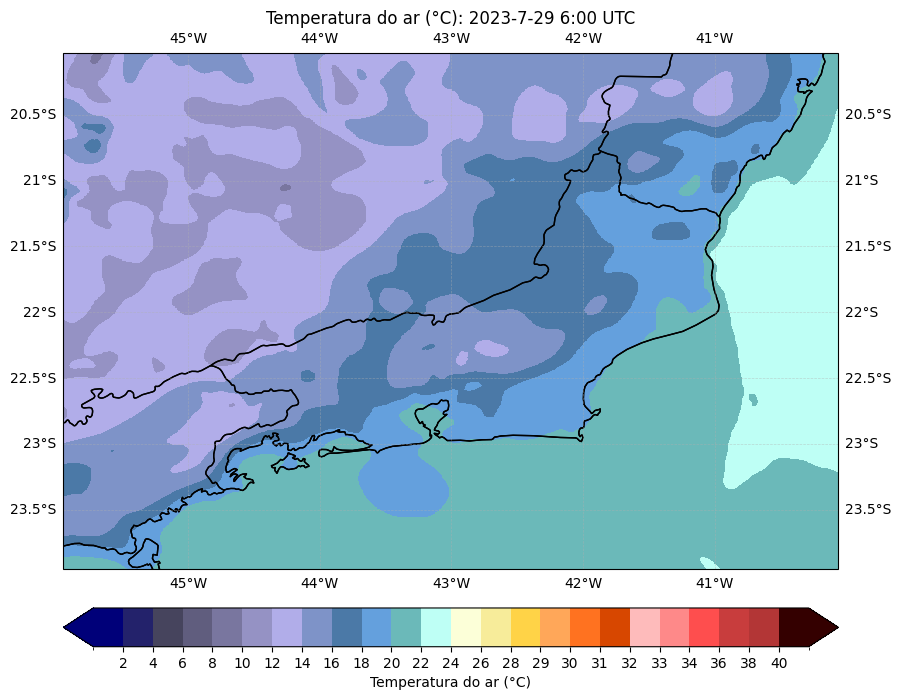

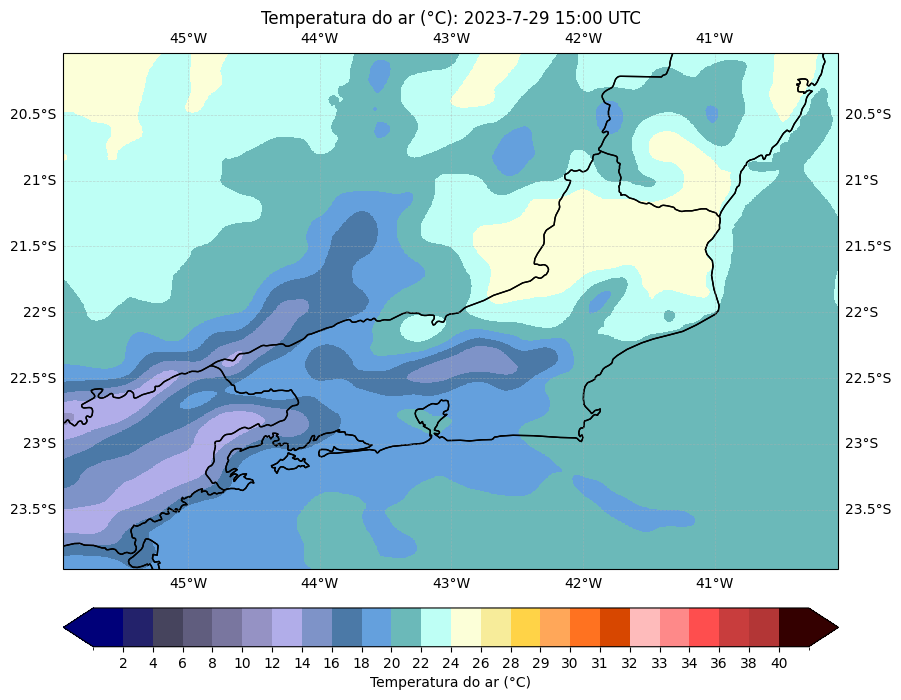

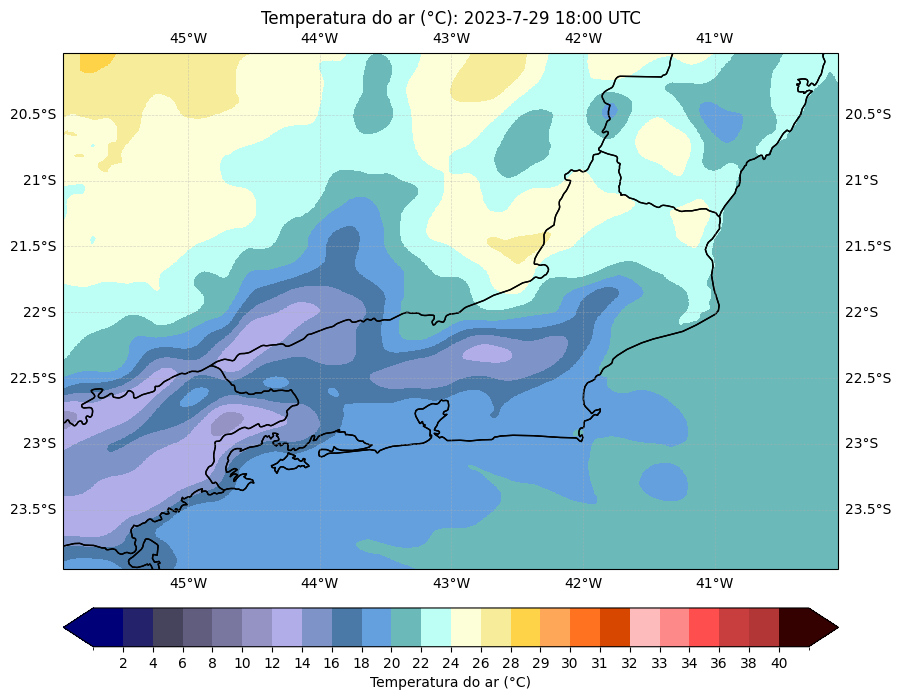

In [10]:
create_plot_temperature(time_next_day_6)
create_plot_temperature(time_next_day_15)
create_plot_temperature(time_next_day_18)

In [11]:
def create_plot_temperature_UFRJ(start_time):
    #UFRJ

    # Create a new plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    title = 'Temperatura do ar (°C): ' + str(pd.to_datetime(start_time.values).year) + '-' + str(pd.to_datetime(start_time.values).month) + '-' + str(pd.to_datetime(start_time.values).day) + ' ' + str(pd.to_datetime(start_time.values).hour) + ':00 UTC'
    bar_title = 'Temperatura do ar (°C)'

    tcc = data["TMP_2maboveground"].sel(time=slice(start_time, start_time))
    tcc = tcc - 273.15

    # Define the grid for interpolation
    longitude_grid, latitude_grid = np.meshgrid(tcc.coords['longitude'], tcc.coords['latitude'])

    # Reshape the data for interpolation
    longitude_points = longitude_grid.flatten()
    latitude_points = latitude_grid.flatten()
    tcc_values = tcc.values.flatten()

    # Define the grid for plotting
    plot_longitude_grid, plot_latitude_grid = np.meshgrid(np.linspace(tcc.coords['longitude'].min(), tcc.coords['longitude'].max(), 1000), np.linspace(tcc.coords['latitude'].min(), tcc.coords['latitude'].max(), 1000))

    # Interpolate the data onto the plotting grid
    interpolated_tcc = griddata((longitude_points, latitude_points), tcc_values, (plot_longitude_grid, plot_latitude_grid), method='cubic')

    # Define os valores de cor para diferentes intervalos de dados

    bounds = [tcc_values.min(), 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0]

    if tcc_values.min() > bounds[1]:
        bounds = [0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0]

    colors = [(158/255, 3/255, 196/255), (109/255, 0/255, 216/255), (33/255, 61/255, 253/255), (0/255, 162/255, 231/255), (0/255, 198/255, 198/255), (0/255, 209/255, 141/255), (0/255, 219/255, 0/255), (160/255, 230/255, 52/255), (232/255, 220/255, 50/255), (230/255, 175/255, 47/255), (240/255, 130/255, 41/255), (241/255, 0/255, 1/255), (222/255, 0/255, 99/255)]
    # Colorlist in matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html

    if tcc_values.min() < bounds[0]:
        print("Valores de temperatura minima inferiores a 2C. Ajustar legenda de cores.")

    if tcc_values.max() > bounds[len(bounds) - 1]:
        print("Valores de temperatura minima superiores a 125C. Ajustar legenda de cores.")

    # Criar a escala de cores personalizada com base nos intervalos definidos
    cmap_custom = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(bounds, cmap_custom.N)

    # Plot the interpolated data using pcolormesh with the customized colormap and norm
    image = ax.pcolormesh(plot_longitude_grid, plot_latitude_grid, interpolated_tcc, transform=ccrs.PlateCarree(), cmap=cmap_custom, norm=norm, shading='auto')

    # Adicionar linhas de contorno com valores
    contour = ax.contour(plot_longitude_grid, plot_latitude_grid, interpolated_tcc, levels=bounds, colors='black', linestyles='dashed', linewidths=0.7)

    # Adicionar os valores de cada linha de contorno
    ax.clabel(contour, inline=True, fontsize=12, fmt='%.1f')

    # Add coastlines
    ax.coastlines(resolution="10m", linewidth=1)

    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',
        edgecolor='black',
        linewidth=0.5
    )
    ax.add_feature(countries)
    ax.add_feature(cfeature.STATES)

    # Add gridlines with labels
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.5)
    gl.top_labels = True
    gl.right_labels = True

    # Set plot title
    ax.set_title(title)

    # Add colorbar
    #cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05)
    cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05, ticks=bounds[1:-1], extend='both', extendfrac='auto')

    cbar.set_label(bar_title)

    # Show the plot
    plt.show()


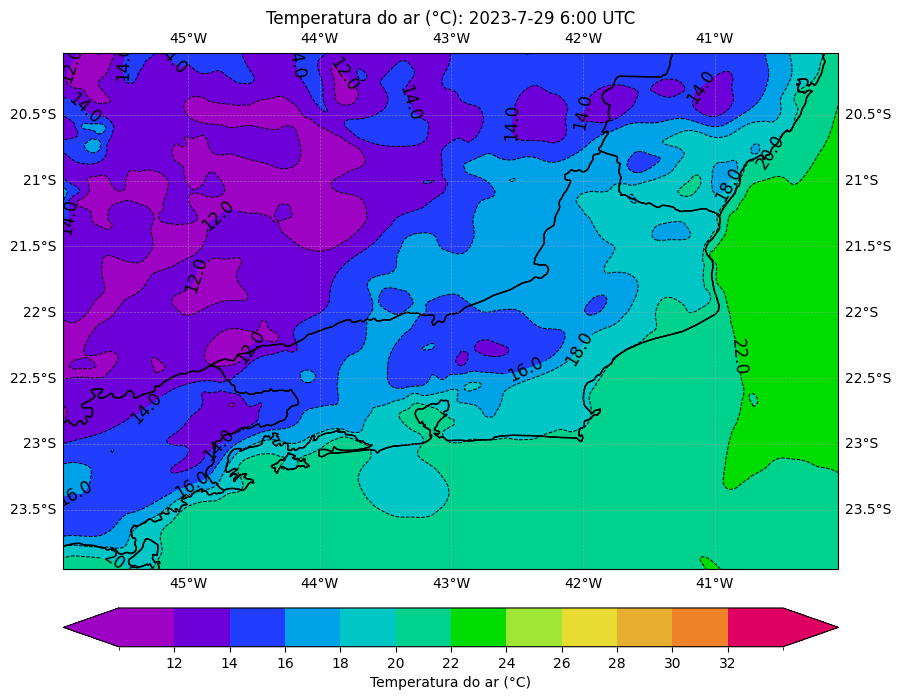

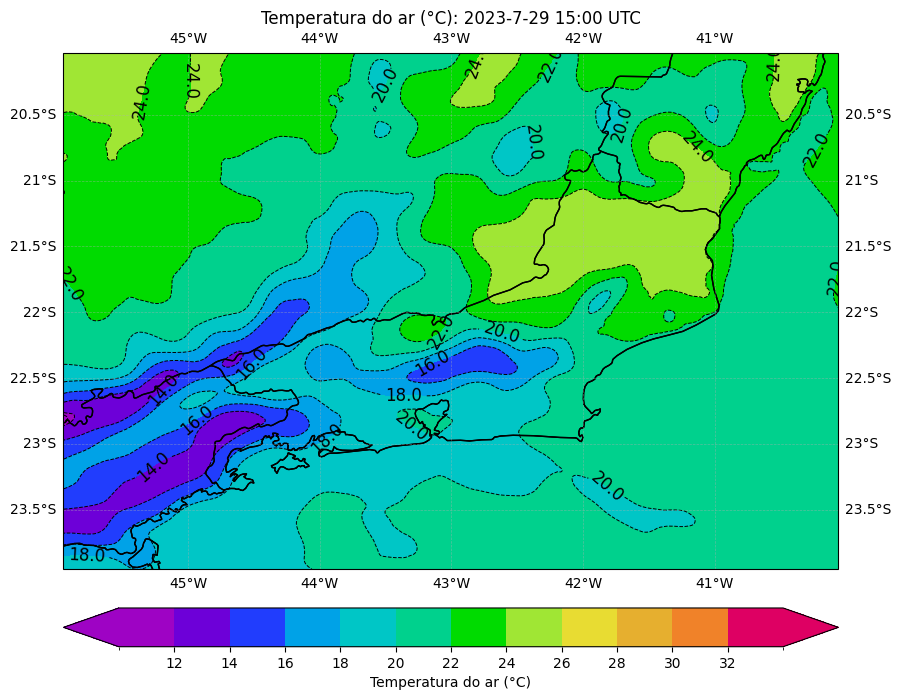

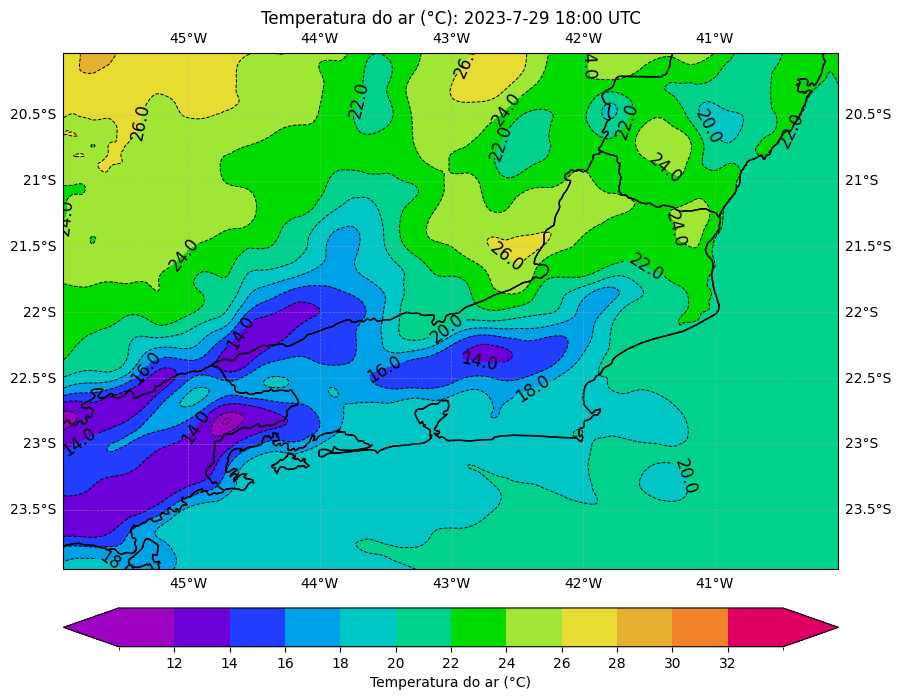

In [12]:
create_plot_temperature_UFRJ(time_next_day_6)
create_plot_temperature_UFRJ(time_next_day_15)
create_plot_temperature_UFRJ(time_next_day_18)

In [13]:
def create_plot_wind_speed_direction(start_time):
    # Create a new plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    title = 'Velocidade do vento (m/s): ' + str(pd.to_datetime(start_time.values).year) + '-' + str(pd.to_datetime(start_time.values).month) + '-' + str(pd.to_datetime(start_time.values).day) + ' ' + str(pd.to_datetime(start_time.values).hour) + ':00 UTC'
    bar_title = 'Velocidade do vento (m/s)'

    v_data = data["VGRD_100maboveground"].sel(time=slice(start_time, start_time))
    u_data = data["UGRD_100maboveground"].sel(time=slice(start_time, start_time))

    wind_speed = np.sqrt(u_data**2 + v_data**2)

    # Define the grid for interpolation
    longitude_grid, latitude_grid = np.meshgrid(v_data.coords['longitude'], v_data.coords['latitude'])

    # Reshape the data for interpolation
    longitude_points = longitude_grid.flatten()
    latitude_points = latitude_grid.flatten()
    wind_speed_values = wind_speed.values.flatten()

    # Define the grid for plotting
    plot_longitude_grid, plot_latitude_grid = np.meshgrid(np.linspace(v_data.coords['longitude'].min(), v_data.coords['longitude'].max(), 1000), np.linspace(v_data.coords['latitude'].min(), v_data.coords['latitude'].max(), 1000))

    # Interpolate the data onto the plotting grid
    interpolated_wind_speed = griddata((longitude_points, latitude_points), wind_speed_values, (plot_longitude_grid, plot_latitude_grid), method='cubic')

    # Define os valores de cor para diferentes intervalos de dados
    bounds = [wind_speed_values.min(), 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, wind_speed_values.max()]

    if bounds[len(bounds)-1] < bounds[len(bounds)-2]:
        bounds = [wind_speed_values.min(), 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 25.0]

    colors = [(208/255, 250/255, 249/255), (177/255, 230/255, 231/255), (184/255, 240/255, 237/255), (253/255, 235/255, 222/255), (247/255, 172/255, 135/255), (239/255, 152/255, 122/255), (228/255, 146/255, 128/255), (203/255, 97/255, 97/255), (185/255, 59/255, 57/255), (157/255, 27/255, 21/255), (26/255, 52/255, 0/255), (170/255, 170/255, 170/255)]
    # Colorlist in matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html

    # Criar a escala de cores personalizada com base nos intervalos definidos
    cmap_custom = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(bounds, cmap_custom.N)

    # Plot the interpolated data using pcolormesh with the customized colormap and norm
    image = ax.pcolormesh(plot_longitude_grid, plot_latitude_grid, interpolated_wind_speed, transform=ccrs.PlateCarree(), cmap=cmap_custom, norm=norm, shading='auto')

    step = 5

    # Plotagem
    ax.quiver(v_data.longitude[::step], v_data.latitude[::step], u_data[0, ::step, ::step], v_data[0, ::step, ::step],
              angles='xy', scale_units='xy', scale=50, color='black')

    # Add coastlines
    ax.coastlines(resolution="10m", linewidth=1)

    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',
        edgecolor='black',
        linewidth=0.5
    )
    ax.add_feature(countries)
    ax.add_feature(cfeature.STATES)

    # Add gridlines with labels
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.5)
    gl.top_labels = True
    gl.right_labels = True

    # Set plot title
    ax.set_title(title)

    # Add colorbar
    #cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05)
    cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05, ticks=bounds[1:-1], extend='both', extendfrac='auto')

    cbar.set_label(bar_title)

    # Show the plot
    plt.show()


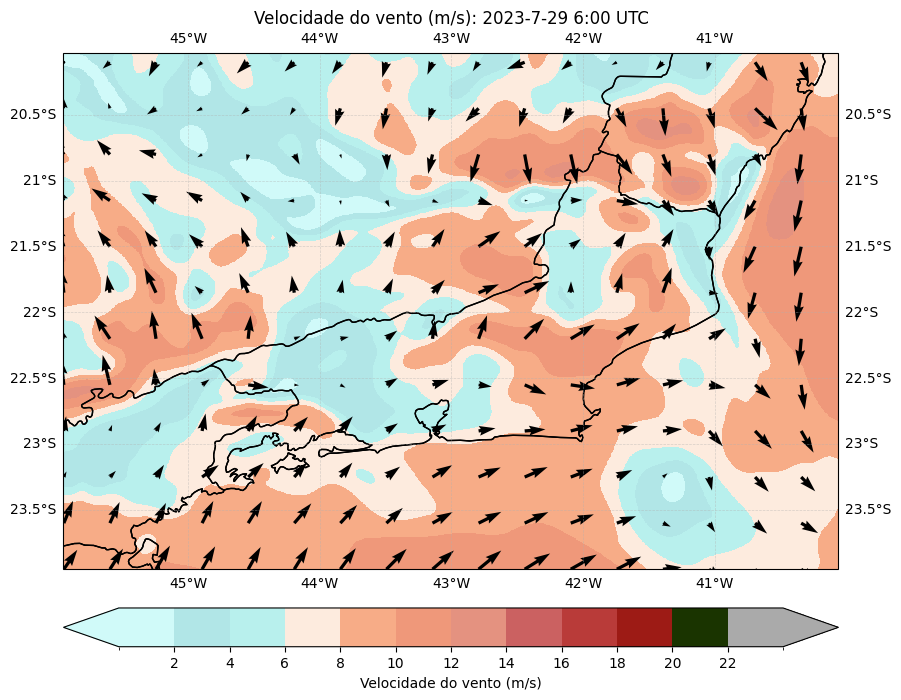

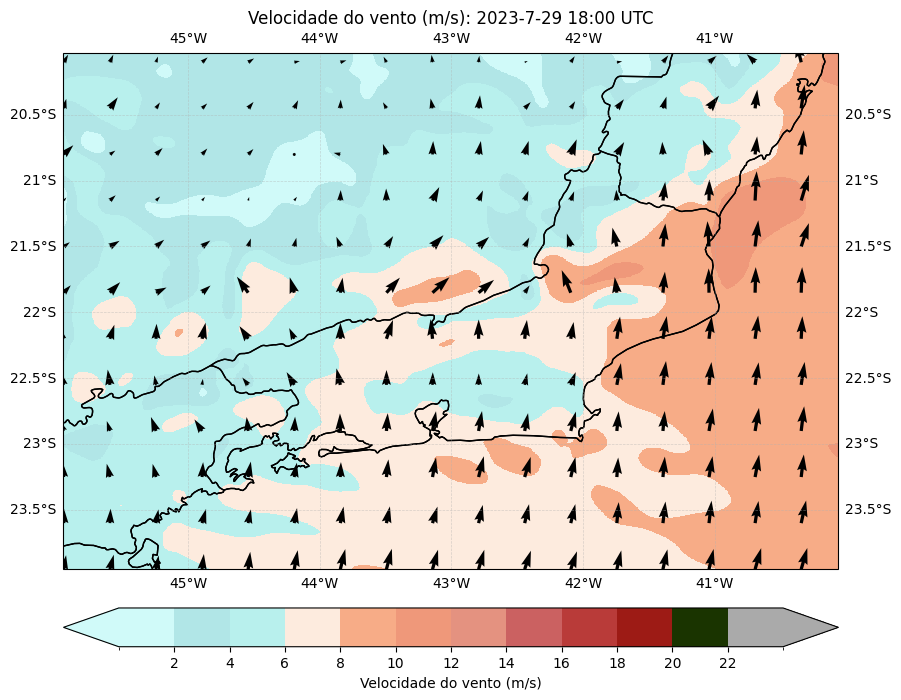

In [14]:
create_plot_wind_speed_direction(time_next_day_6)
#create_plot_wind_speed_direction(time_next_day_15)
create_plot_wind_speed_direction(time_next_day_18)

In [15]:
def create_plot_relative_humidity(start_time):
    # Create a new plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    title = 'Umidade relativa (%): ' + str(pd.to_datetime(start_time.values).year) + '-' + str(pd.to_datetime(start_time.values).month) + '-' + str(pd.to_datetime(start_time.values).day) + ' ' + str(pd.to_datetime(start_time.values).hour) + ':00 UTC'
    bar_title = 'Umidade relativa (%)'

    RH = data["RH_2maboveground"].sel(time=slice(start_time, start_time))

    # Define the grid for interpolation
    longitude_grid, latitude_grid = np.meshgrid(RH.coords['longitude'], RH.coords['latitude'])

    # Reshape the data for interpolation
    longitude_points = longitude_grid.flatten()
    latitude_points = latitude_grid.flatten()
    RH_values = RH.values.flatten()

    # Define the grid for plotting
    plot_longitude_grid, plot_latitude_grid = np.meshgrid(np.linspace(RH.coords['longitude'].min(), RH.coords['longitude'].max(), 1000), np.linspace(RH.coords['latitude'].min(), RH.coords['latitude'].max(), 1000))

    # Interpolate the data onto the plotting grid
    interpolated_RH = griddata((longitude_points, latitude_points), RH_values, (plot_longitude_grid, plot_latitude_grid), method='cubic')

    bounds = [0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 120.0]

    colors = [(81/255, 12/255, 10/255), (126/255, 3/255, 4/255), (165/255, 3/255, 1/255), (197/255, 1/255, 1/255), (231/255, 3/255, 5/255), (252/255, 9/255, 3/255), (248/255, 52/255, 2/255), (251/255, 95/255, 10/255), (254/255, 132/255, 4/255), (248/255, 160/255, 50/255), (249/255, 195/255, 121/255), (252/255, 225/255, 193/255), (248/255, 249/255, 251/255), (173/255, 217/255, 230/255), (152/255, 192/255, 218/255), (134/255, 167/255, 210/255), (117/255, 143/255, 197/255), (96/255, 120/255, 190/255), (75/255, 96/255, 179/255), (58/255, 72/255, 169/255), (38/255, 48/255, 159/255), (19/255, 25/255, 149/255)]
    # Colorlist in matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html

    # Criar a escala de cores personalizada com base nos intervalos definidos
    cmap_custom = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(bounds, cmap_custom.N)

    # Plot the interpolated data using pcolormesh with the customized colormap and norm
    image = ax.pcolormesh(plot_longitude_grid, plot_latitude_grid, interpolated_RH, transform=ccrs.PlateCarree(), cmap=cmap_custom, norm=norm, shading='auto')

    # Add coastlines
    ax.coastlines(resolution="10m", linewidth=1)

    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',
        edgecolor='black',
        linewidth=0.5
    )
    ax.add_feature(countries)
    ax.add_feature(cfeature.STATES)

    # Add gridlines with labels
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.5)
    gl.top_labels = True
    gl.right_labels = True

    # Set plot title
    ax.set_title(title)

    # Add colorbar
    #cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05)
    cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05, ticks=bounds[1:-1], extend='both', extendfrac='auto')

    cbar.set_label(bar_title)

    # Show the plot
    plt.show()


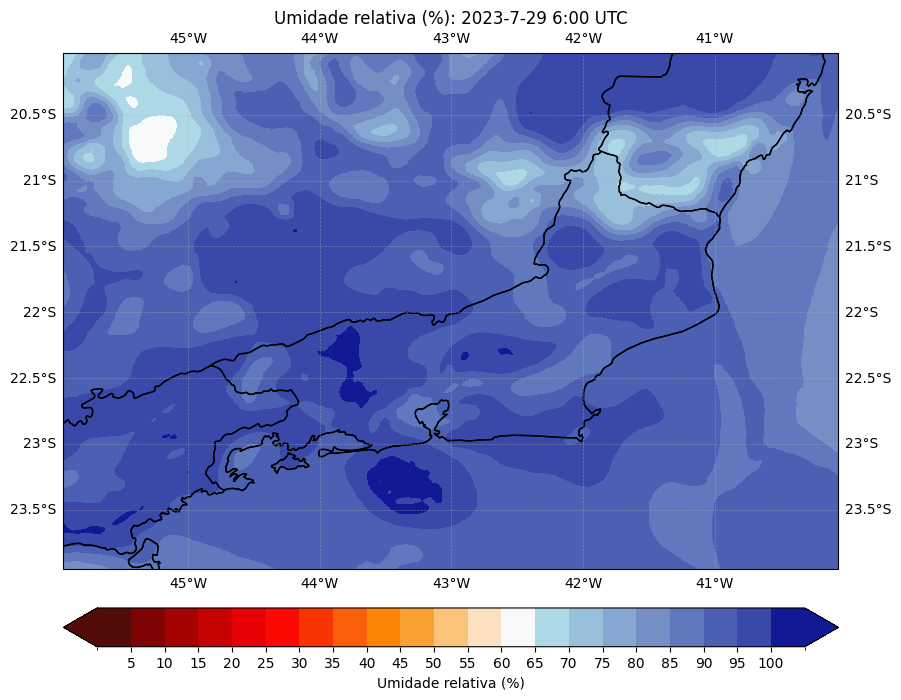

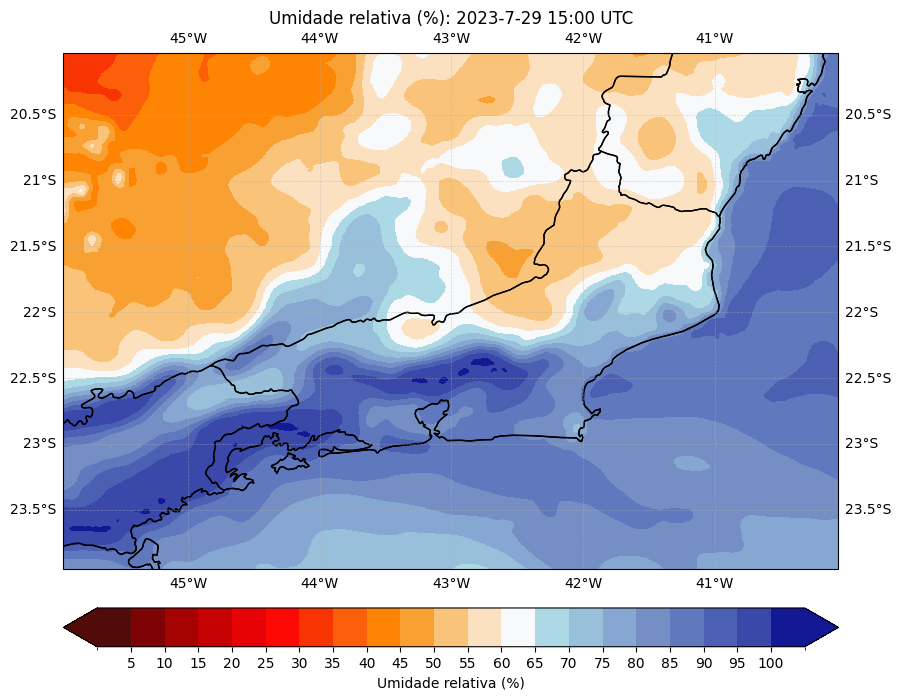

In [16]:
create_plot_relative_humidity(time_next_day_6)
create_plot_relative_humidity(time_next_day_15)
#create_plot_relative_humidity(time_next_day_18)

In [17]:
def create_plot_wind_power(start_time):
    # Create a new plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    title = 'Densidade de potencia eolica (W/m$^{2}$): ' + str(pd.to_datetime(start_time.values).year) + '-' + str(pd.to_datetime(start_time.values).month) + '-' + str(pd.to_datetime(start_time.values).day) + ' ' + str(pd.to_datetime(start_time.values).hour) + ':00 UTC'
    bar_title = 'Densidade de potencia eolica (W/m$^{2}$)'

    v_data = data["VGRD_100maboveground"].sel(time=slice(start_time, start_time))
    u_data = data["UGRD_100maboveground"].sel(time=slice(start_time, start_time))

    wind_speed = np.sqrt(u_data**2 + v_data**2)

    wind_power = 0.5*1.225*wind_speed**3

    # Define the grid for interpolation
    longitude_grid, latitude_grid = np.meshgrid(wind_power.coords['longitude'], wind_power.coords['latitude'])

    # Reshape the data for interpolation
    longitude_points = longitude_grid.flatten()
    latitude_points = latitude_grid.flatten()
    wind_power_values = wind_power.values.flatten()

    # Define the grid for plotting
    plot_longitude_grid, plot_latitude_grid = np.meshgrid(np.linspace(wind_power.coords['longitude'].min(), wind_power.coords['longitude'].max(), 1000), np.linspace(wind_power.coords['latitude'].min(), wind_power.coords['latitude'].max(), 1000))

    # Interpolate the data onto the plotting grid
    interpolated_wind_power = griddata((longitude_points, latitude_points), wind_power_values, (plot_longitude_grid, plot_latitude_grid), method='cubic')

    # Define os valores de cor para diferentes intervalos de dados
    if wind_power_values.max() > 2000.0:
        bounds = [wind_power_values.min(), 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, wind_power_values.max()]
    else:
        bounds = [wind_power_values.min(), 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 2000.0]

    colors = [(255/255, 255/255, 255/255), (222/255, 237/255, 224/255), (193/255, 222/255, 190/255), (159/255, 204/255, 161/255), (129/255, 188/255, 129/255), (96/255, 172/255, 97/255), (65/255, 155/255, 69/255), (34/255, 139/255, 31/255), (253/255, 229/255, 183/255), (254/255, 209/255, 155/255), (252/255, 195/255, 108/255), (250/255, 177/255, 75/255), (254/255, 157/255, 35/255), (251/255, 137/255, 4/255), (240/255, 100/255, 103/255), (235/255, 50/255, 56/255)]
    # Colorlist in matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html

    # Criar a escala de cores personalizada com base nos intervalos definidos
    cmap_custom = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(bounds, cmap_custom.N)

    # Plot the interpolated data using pcolormesh with the customized colormap and norm
    image = ax.pcolormesh(plot_longitude_grid, plot_latitude_grid, interpolated_wind_power, transform=ccrs.PlateCarree(), cmap=cmap_custom, norm=norm, shading='auto')

    # Add coastlines
    ax.coastlines(resolution="10m", linewidth=1)

    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',
        edgecolor='black',
        linewidth=0.5
    )
    ax.add_feature(countries)
    ax.add_feature(cfeature.STATES)

    # Add gridlines with labels
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.5)
    gl.top_labels = True
    gl.right_labels = True

    # Set plot title
    ax.set_title(title)

    # Add colorbar
    #cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05)
    cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05, ticks=bounds[1:-1], extend='both', extendfrac='auto')

    cbar.set_label(bar_title)

    # Show the plot
    plt.show()



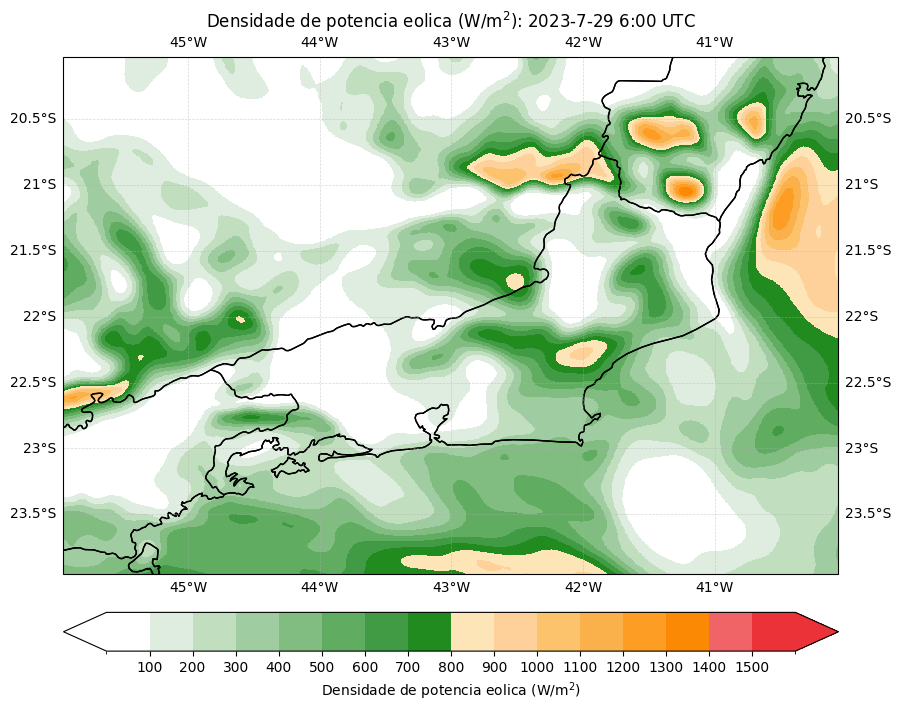

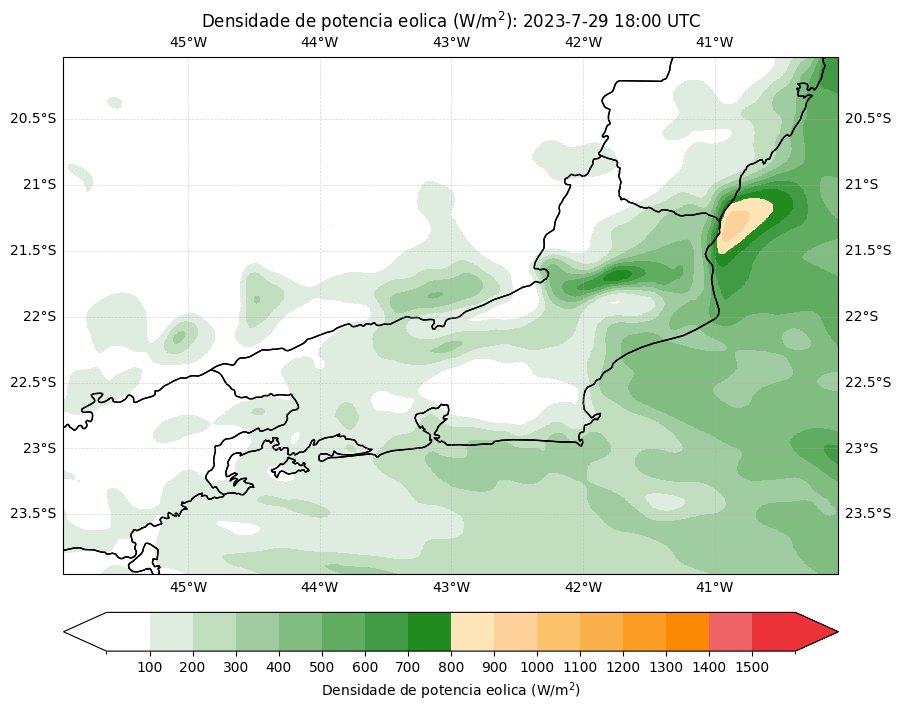

In [18]:
create_plot_wind_power(time_next_day_6)
#create_plot_wind_power(time_next_day_15)
create_plot_wind_power(time_next_day_18)

In [19]:
def create_plot_radiation(start_time):
    # Create a new plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    title = 'Irradiacao solar incidente (W/m$^{2}$): ' + str(pd.to_datetime(start_time.values).year) + '-' + str(pd.to_datetime(start_time.values).month) + '-' + str(pd.to_datetime(start_time.values).day) + ' ' + str(pd.to_datetime(start_time.values).hour) + ':00 UTC'
    bar_title = 'Irradiacao solar incidente (W/m$^{2}$)'

    rad = data["DSWRF_surface"].sel(time=slice(start_time, start_time))

    # Define the grid for interpolation
    longitude_grid, latitude_grid = np.meshgrid(rad.coords['longitude'], rad.coords['latitude'])

    # Reshape the data for interpolation
    longitude_points = longitude_grid.flatten()
    latitude_points = latitude_grid.flatten()
    rad_values = rad.values.flatten()

    # Define the grid for plotting
    plot_longitude_grid, plot_latitude_grid = np.meshgrid(np.linspace(rad.coords['longitude'].min(), rad.coords['longitude'].max(), 1000), np.linspace(rad.coords['latitude'].min(), rad.coords['latitude'].max(), 1000))

    # Interpolate the data onto the plotting grid
    interpolated_rad = griddata((longitude_points, latitude_points), rad_values, (plot_longitude_grid, plot_latitude_grid), method='cubic')

    # Define os valores de cor para diferentes intervalos de dados
    if rad_values.max() > 2000.0:
        bounds = [50.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, tcc_values.max()]
    else:
        bounds = [50.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 2000.0]

    colors = [(3/255, 4/255, 94/255), (3/255, 4/255, 94/255), (3/255, 62/255, 138/255), (1/255, 107/255, 169/255), (39/255, 137/255, 182/255), (77/255, 167/255, 193/255), (137/255, 208/255, 147/255), (187/255, 248/255, 98/255), (255/255, 255/255, 0/255), (254/255, 227/255, 0/255), (255/255, 170/255, 1/255), (244/255, 140/255, 5/255), (232/255, 92/255, 4/255), (220/255, 48/255, 2/255), (208/255, 0/255, 0/255), (157/255, 2/255, 8/255), (106/255, 4/255, 15/255)]
    # Colorlist in matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html

    # Criar a escala de cores personalizada com base nos intervalos definidos
    cmap_custom = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(bounds, cmap_custom.N)

    # Plot the interpolated data using pcolormesh with the customized colormap and norm
    image = ax.pcolormesh(plot_longitude_grid, plot_latitude_grid, interpolated_rad, transform=ccrs.PlateCarree(), cmap=cmap_custom, norm=norm, shading='auto')

    # Add coastlines
    ax.coastlines(resolution="10m", linewidth=1)

    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',
        edgecolor='black',
        linewidth=0.5
    )
    ax.add_feature(countries)
    ax.add_feature(cfeature.STATES)

    # Add gridlines with labels
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.5)
    gl.top_labels = True
    gl.right_labels = True

    # Set plot title
    ax.set_title(title)

    # Add colorbar
    #cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05)
    cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05, ticks=bounds[1:-1], extend='both', extendfrac='auto')

    cbar.set_label(bar_title)

    # Show the plot
    plt.show()


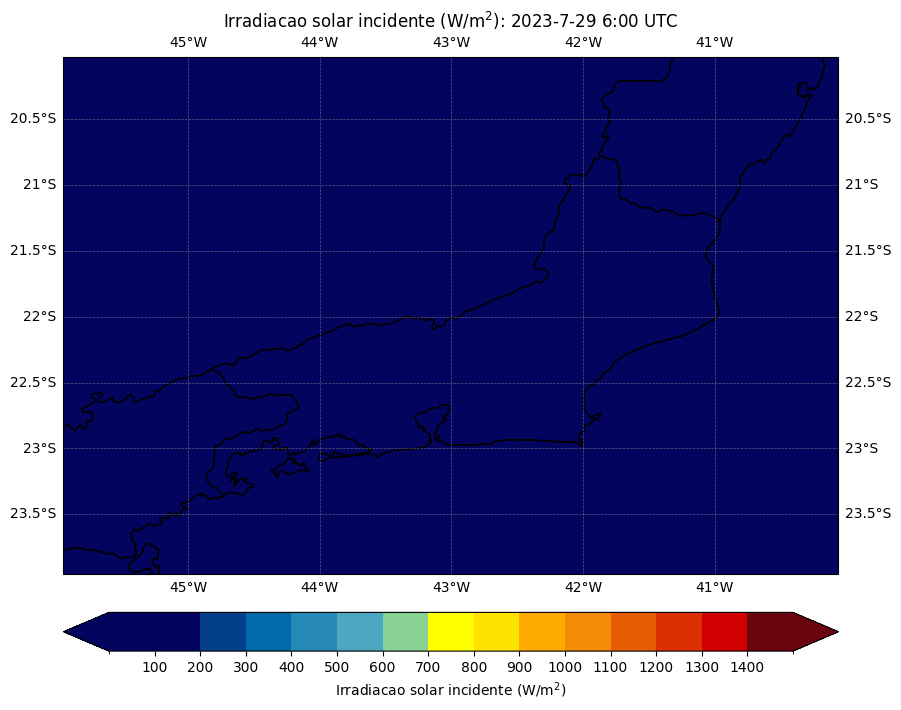

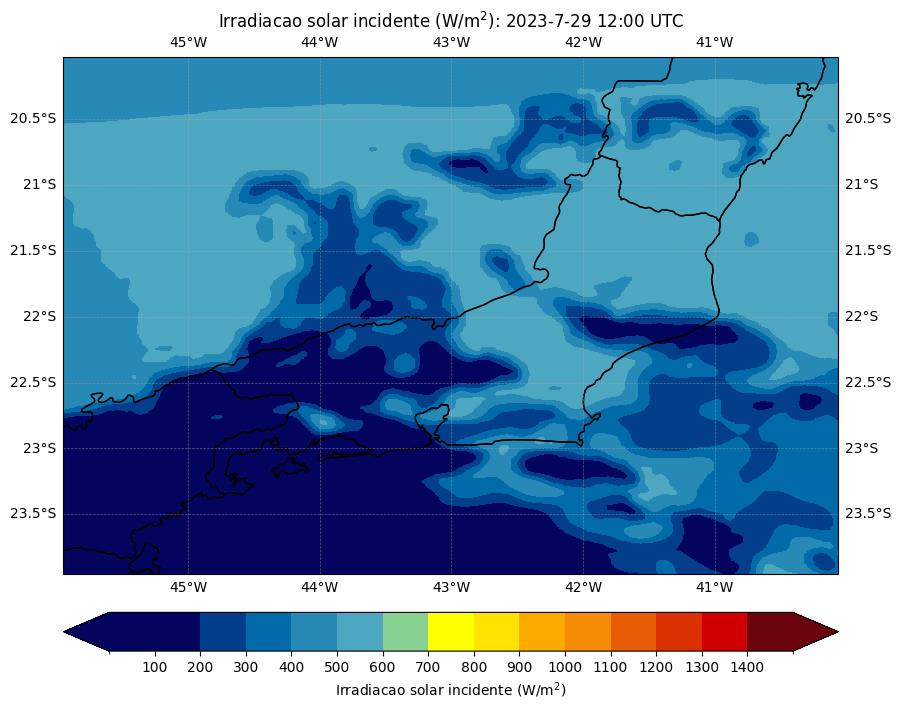

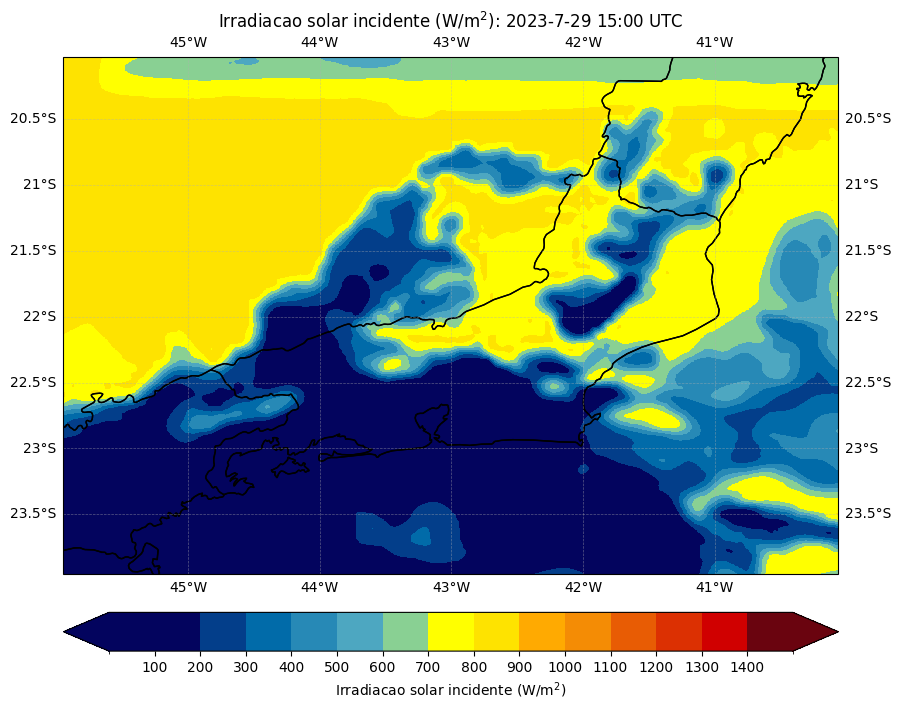

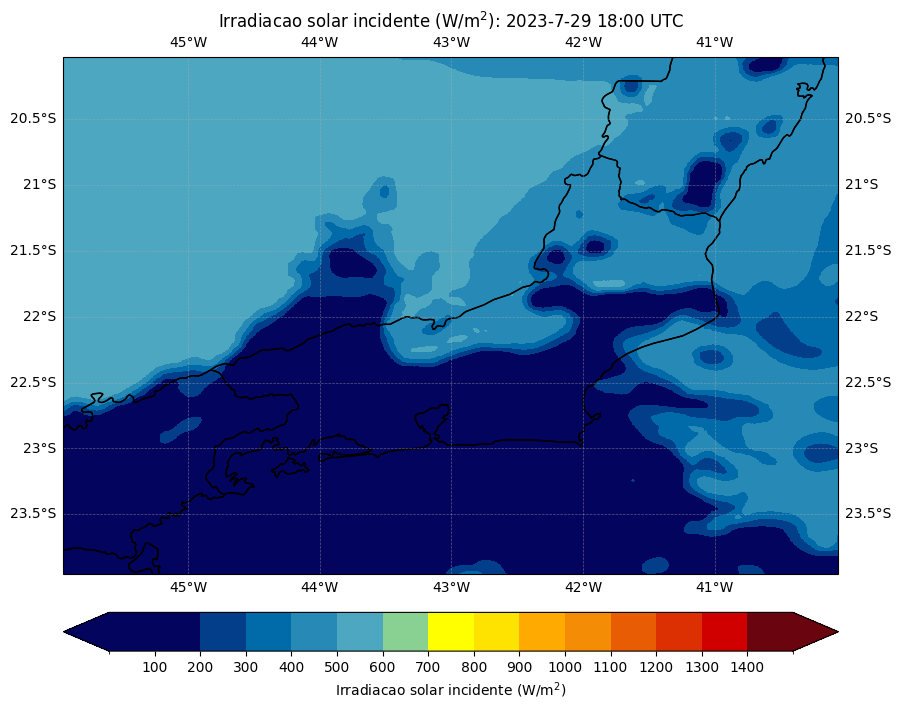

In [20]:
create_plot_radiation(time_next_day_6)
create_plot_radiation(time_next_day_12)
create_plot_radiation(time_next_day_15)
create_plot_radiation(time_next_day_18)

In [21]:
def create_plot_precipitation(start_time, end_time):
    # Create a new plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    title = 'Precipitacao diaria (mm): ' + str(pd.to_datetime(start_time.values).year) + '-' + str(pd.to_datetime(start_time.values).month) + '-' + str(pd.to_datetime(start_time.values).day)
    bar_title = 'Precipitacao diaria (mm)'

    prec = data["APCP_surface"].sel(time=slice(start_time, end_time)).sum(dim='time')

    # Define the grid for interpolation
    longitude_grid, latitude_grid = np.meshgrid(prec.coords['longitude'], prec.coords['latitude'])

    # Reshape the data for interpolation
    longitude_points = longitude_grid.flatten()
    latitude_points = latitude_grid.flatten()
    prec_values = prec.values.flatten()

    # Define the grid for plotting
    plot_longitude_grid, plot_latitude_grid = np.meshgrid(np.linspace(prec.coords['longitude'].min(), prec.coords['longitude'].max(), 1000), np.linspace(prec.coords['latitude'].min(), prec.coords['latitude'].max(), 1000))

    # Interpolate the data onto the plotting grid
    interpolated_prec = griddata((longitude_points, latitude_points), prec_values, (plot_longitude_grid, plot_latitude_grid), method='cubic')

    # Define os valores de cor para diferentes intervalos de dados
    if prec_values.max()>125.0:
        bounds = [prec_values.min(), 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 75.0, 100.0, 125.0, prec_values.max()]
    else:
        bounds = [prec_values.min(), 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 75.0, 100.0, 125.0, 150.0]

    colors = [(250/255, 253/255, 253/255), (180/255, 238/255, 249/255), (150/255, 209/255, 249/255), (62/255, 117/255, 220/255), (44/255, 78/255, 181/255), (11/255, 26/255, 131/255), (254/255, 254/255, 191/255), (255/255, 254/255, 63/255), (255/255, 192/255, 130/255), (253/255, 128/255, 0/255), (186/255, 17/255, 20/255), (124/255, 124/255, 124/255)]
    # Colorlist in matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html

    # Criar a escala de cores personalizada com base nos intervalos definidos
    cmap_custom = mcolors.ListedColormap(colors)
    norm = mcolors.BoundaryNorm(bounds, cmap_custom.N)

    # Plot the interpolated data using pcolormesh with the customized colormap and norm
    image = ax.pcolormesh(plot_longitude_grid, plot_latitude_grid, interpolated_prec, transform=ccrs.PlateCarree(), cmap=cmap_custom, norm=norm, shading='auto')

    # Add coastlines
    ax.coastlines(resolution="10m", linewidth=1)

    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',
        edgecolor='black',
        linewidth=0.5
    )
    ax.add_feature(countries)
    ax.add_feature(cfeature.STATES)

    # Add gridlines with labels
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.5)
    gl.top_labels = True
    gl.right_labels = True

    # Set plot title
    ax.set_title(title)

    # Add colorbar
    #cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05)
    cbar = fig.colorbar(image, ax=ax, orientation='horizontal', pad=0.05, ticks=bounds[1:-1], extend='both', extendfrac='auto')

    cbar.set_label(bar_title)

    # Show the plot
    plt.show()


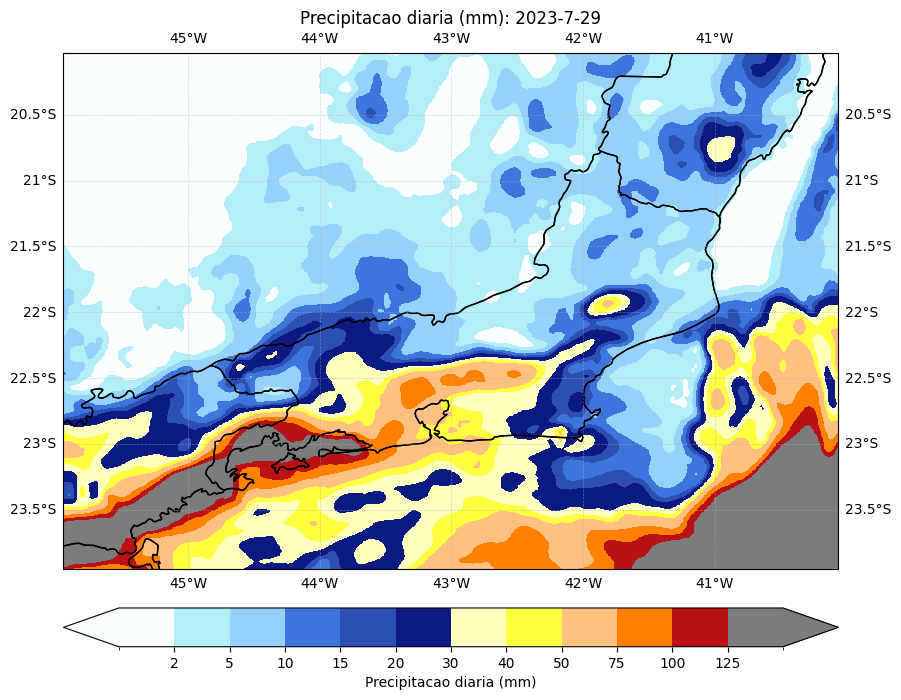

In [24]:
create_plot_precipitation(data.time[24], data.time[47])
#create_plot_precipitation(data.time[48], data.time[71])
#create_plot_precipitation(data.time[72], data.time[95])

In [25]:
def create_plot_pressure(start_time, time_index):
    # Criando o DataArray a partir dos seus dados (substitua os nomes das variáveis pelos seus dados reais)
    pressure_data = data["PRMSL_meansealevel"]/100

    title = 'Pressao media a nivel do mar (hPa): ' + str(pd.to_datetime(start_time.values).year) + '-' + str(pd.to_datetime(start_time.values).month) + '-' + str(pd.to_datetime(start_time.values).day) + ' ' + str(pd.to_datetime(start_time.values).hour) + ':00 UTC'

    # Selecionando um ponto no tempo para plotar as isóbaras (por exemplo, índice 0)
    pressure_slice = pressure_data.isel(time=time_index)

    # Plotagem
    plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())


    # Escolhendo a paleta de cores "plasma" para as isóbaras
    cmap = plt.get_cmap('rainbow')

    num_levels = 10  # Número de níveis desejados
    levels = np.linspace(np.min(pressure_slice), np.max(pressure_slice), num_levels)

    # Criando as linhas de contorno (isóbaras) com cores distintas
    contour = ax.contour(pressure_slice.longitude, pressure_slice.latitude, pressure_slice,
                         levels=levels, cmap=cmap, linewidths=1.0)

    # Adicionando rótulos para as isóbaras
    plt.clabel(contour, inline=True, fontsize=8, fmt='%d')

    # Add coastlines
    ax.coastlines(resolution="10m", linewidth=1)

    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',
        edgecolor='black',
        linewidth=0.5
    )
    ax.add_feature(countries)
    ax.add_feature(cfeature.STATES)

    # Add gridlines with labels
    gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.5)
    gl.top_labels = True
    gl.right_labels = True

    # Set plot title
    ax.set_title(title)


    # Show the plot
    plt.show()


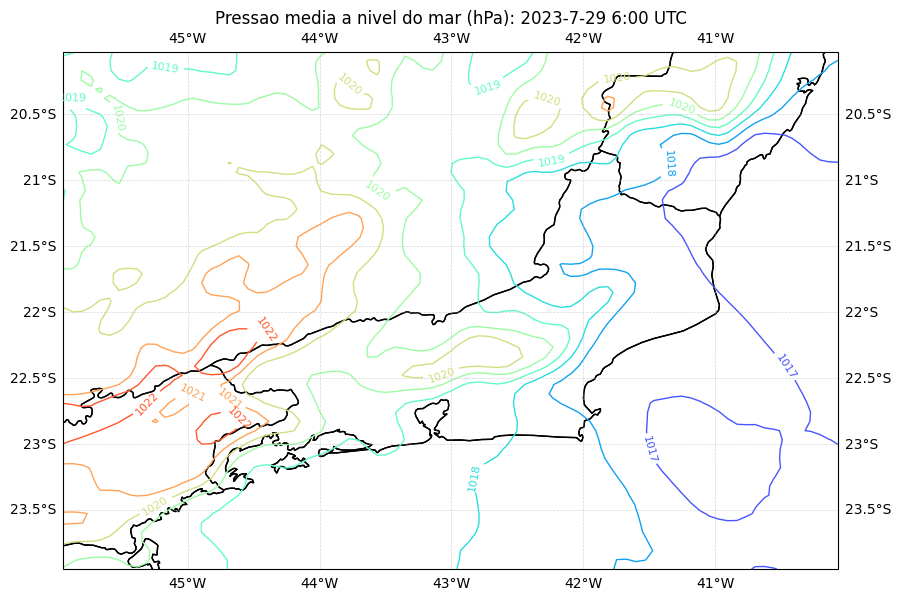

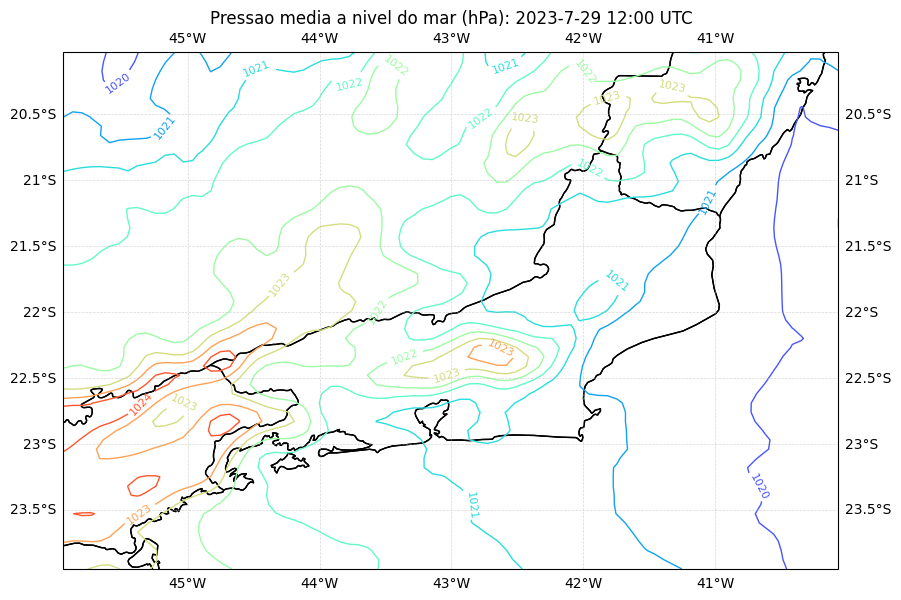

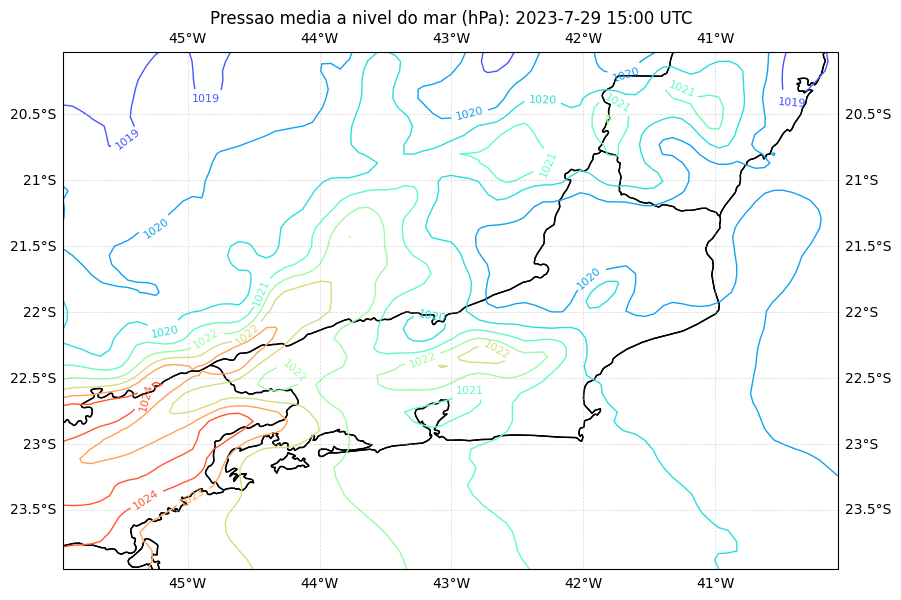

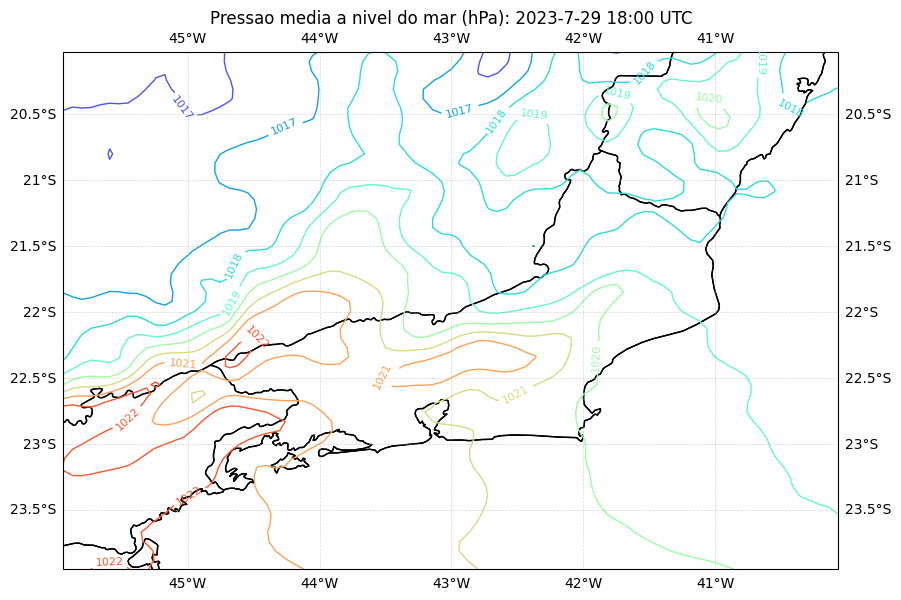

In [26]:
create_plot_pressure(time_next_day_6, 30)
create_plot_pressure(time_next_day_12, 36)
create_plot_pressure(time_next_day_15, 39)
create_plot_pressure(time_next_day_18, 42)